# Forecasting

Importiamo le librerie necessarie e definiamo il path dove stanno i dataset

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
path = r".\\DataSet\\"
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import sklearn.metrics as met

Apriamo il csv contenente i dati, convertiamo la data e raggruppiamo per giorno i risultati delle varie stazioni alle varie ore del giorno, facendone la media.

In [2]:
allMadrid = pd.read_csv(path+"out.csv")
allMadrid['date'] = pd.to_datetime(allMadrid['date'], format='%Y/%m/%d')
allMadrid['date']=allMadrid['date'].dt.normalize()
allMadrid=allMadrid.groupby(['date']).mean()
display(allMadrid)

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
date,,,,,,,,,,,,,
2008-01-01,1.314348,0.652554,1.040163,0.314783,11.820078,67.084565,9.280977,39.855419,25.650870,19.815357,1.656304,4.026522,2.807902e+07
2008-01-02,1.128177,0.531806,1.016719,0.270625,11.820078,66.552372,9.750819,21.005401,15.767895,14.897970,1.536750,3.857708,2.807902e+07
2008-01-03,0.727969,0.360000,0.942292,0.229083,11.820078,50.410930,30.313847,9.173423,5.617396,10.923919,1.400333,2.911875,2.807902e+07
2008-01-04,0.907969,0.458993,1.062031,0.257647,11.820078,58.247292,20.756432,21.390939,13.236000,12.875144,1.409706,4.055104,2.807902e+07
2008-01-05,0.823750,0.389635,0.785260,0.238250,11.820078,47.282292,20.405407,18.745682,12.485729,11.804503,1.482792,3.244219,2.807902e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-27,0.364583,0.249583,0.443750,0.062639,7.756522,26.074783,65.695783,26.278317,10.256944,3.677966,1.340833,1.625000,2.807904e+07
2018-04-28,0.216667,0.212917,0.194444,0.055000,2.824653,13.512153,71.706587,10.971154,5.930556,3.604167,1.300556,0.691667,2.807904e+07
2018-04-29,0.193750,0.218333,0.133333,0.053194,2.333333,11.098958,78.044643,6.955128,3.229167,3.591667,1.289861,0.370833,2.807904e+07


In [3]:
allMadrid.isnull().sum()

BEN        0
CO         0
EBE        0
NMHC       0
NO         0
NO_2       0
O_3        0
PM10       0
PM25       0
SO_2       0
TCH        0
TOL        0
station    0
dtype: int64

## SO2

Prendiamo i dati relativi al SO2 e stampiamo il suo andamento

<AxesSubplot: xlabel='date'>

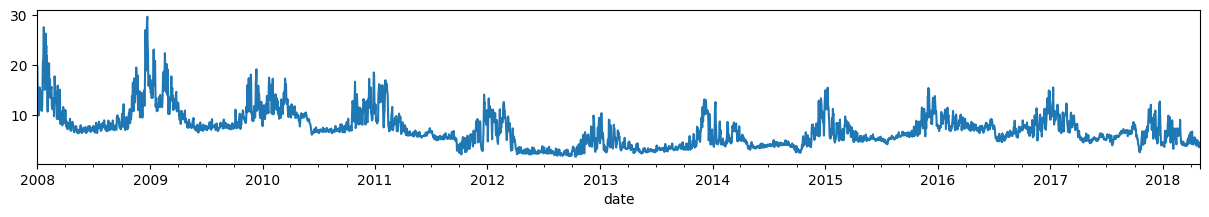

In [4]:
forSo = allMadrid['SO_2']
forSo.plot(figsize=(15, 2))

### Augmented dickey fuller test (Stazionarietà)

In [5]:
X2 = forSo.values
result2 = adfuller(X2)
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.617670
p-value: 0.000120
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


### Stagionalità, trend e residui

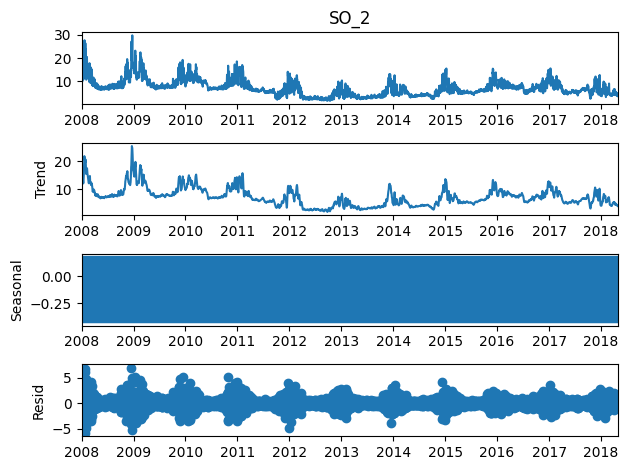

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec2 = seasonal_decompose(forSo, model='additive')
dec2.plot()
plt.show()

### Autocorrelazione e Autocorrelazione parziale

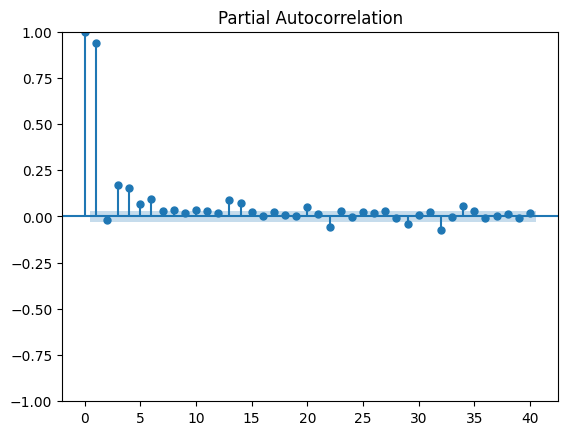

In [7]:
sm.graphics.tsa.plot_pacf(forSo.values.squeeze(), lags=40, method="ywm")
plt.show()

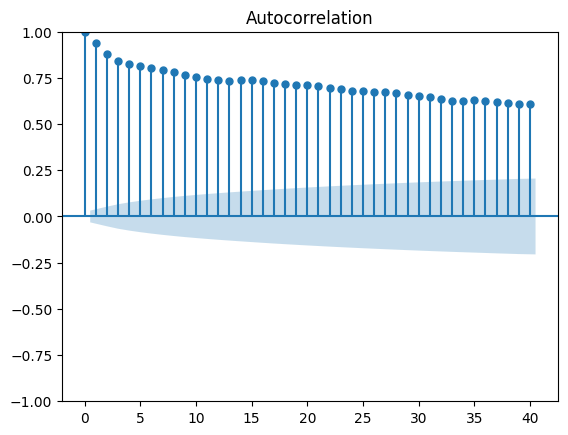

In [8]:
sm.graphics.tsa.plot_acf(forSo.values.squeeze(), lags=40)
plt.show()

### Modello per predizione

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


KeyboardInterrupt: 

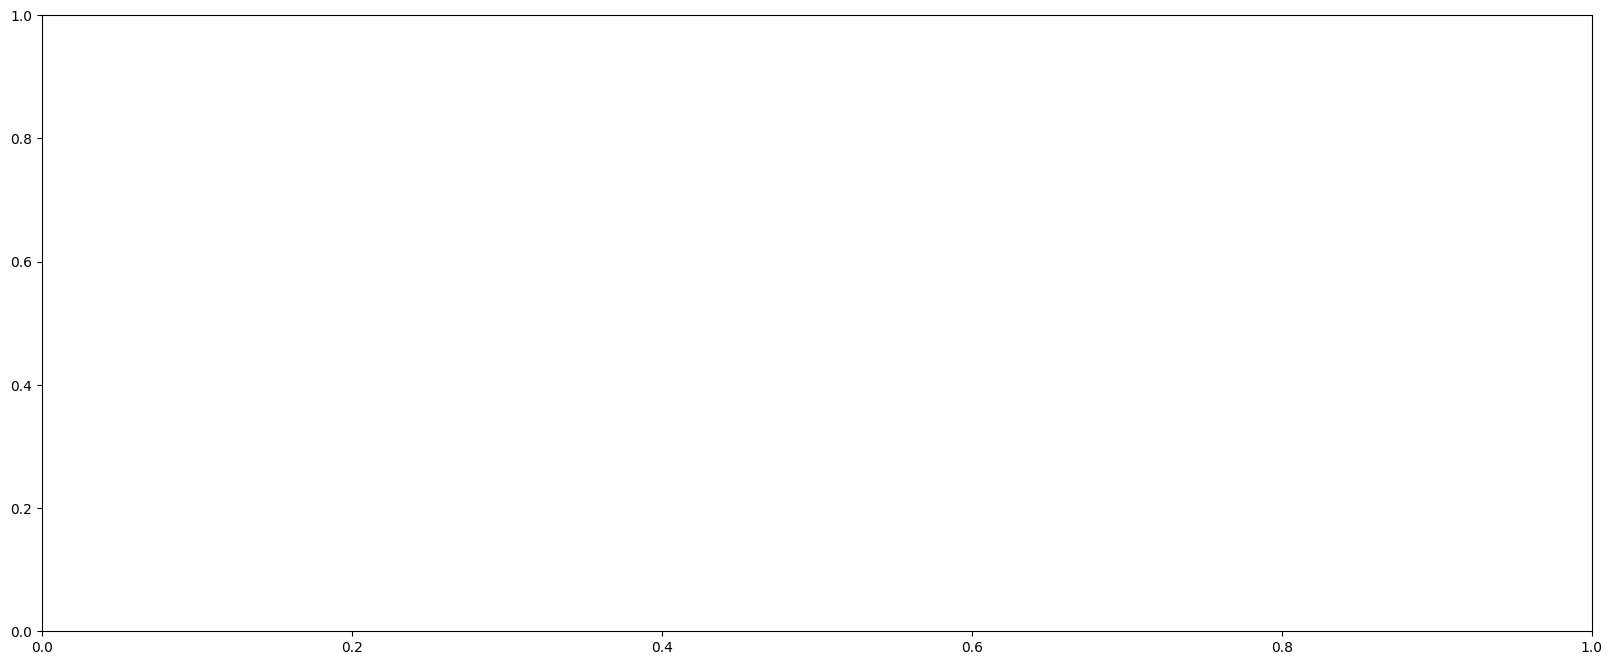

In [72]:
nobs = len(forSo)
n_init_training = int(nobs * 0.8)

# Creiamo il modello per il training
init_training_forSo = forSo[:n_init_training]
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(init_training_forSo, seasonal_order=(2,2,4,12)) 
ax = plt.gca()
results_80 = model.fit() 
plt.plot(forSo)
plt.plot(results_80.fittedvalues, color='red')
ax.legend(['SO_2', 'Forecast'])

print(results_80.summary())
print("Il numero degli elementi del periodo considerato è: "+str(nobs))
print("L'indice dell'ultimo elemento del training set è: "+str(n_init_training))

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               SO_2   No. Observations:                 2021
Model:             ARIMA(3, 1, 2)x(0, 0, [1], 12)   Log Likelihood               -2673.050
Date:                            Thu, 01 Dec 2022   AIC                           5360.100
Time:                                    12:42:47   BIC                           5399.376
Sample:                                06-01-2011   HQIC                          5374.514
                                     - 12-11-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0332      0.082     -0.407      0.684      -0.193       0.127
ar.L2          0.5000      0.061   

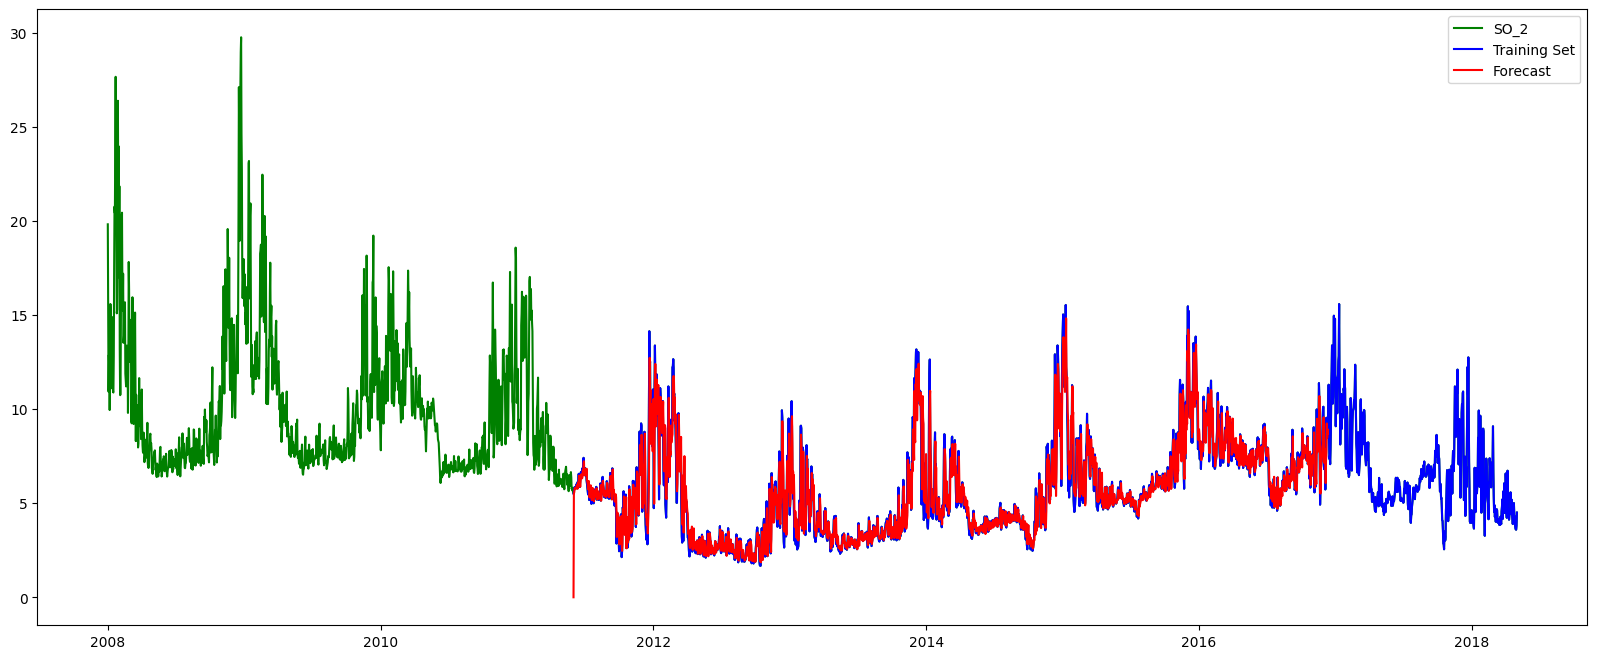

In [77]:
last_period=forSo['2011-06-01':]
nobs_last = len(last_period)
n_init_training_last = int(nobs_last * 0.8)

# Creiamo il modello per il training
init_training_last = last_period[:n_init_training_last]
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model_last = ARIMA(init_training_last, order=(3,1,2), seasonal_order=(0,0,1,12)) 
ax = plt.gca()
results_last = model_last.fit() 
plt.plot(forSo, color='g')
plt.plot(last_period, color='b')
plt.plot(results_last.fittedvalues, color='red')
ax.legend(['SO_2', 'Training Set','Forecast'])

print(results_last.summary())
print("Il numero degli elementi del periodo considerato è: "+str(nobs_last))
print("L'indice dell'ultimo elemento del training set è: "+str(n_init_training_last))

### Predizione in-sample

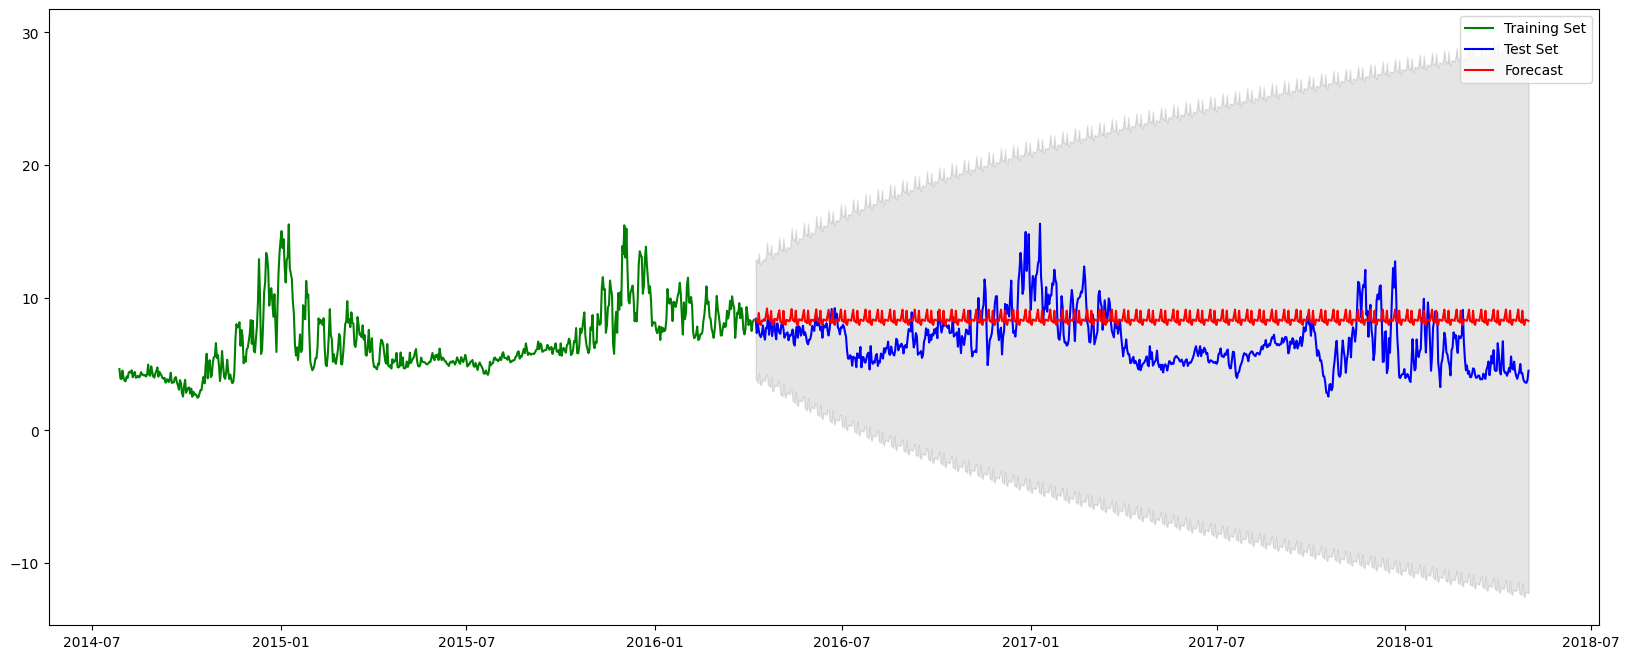

In [70]:
fig = plt.figure(figsize=(20,8))
x2 = results_80.get_prediction(start=(n_init_training+1), end=(nobs-1)).summary_frame()

plt.plot(init_training_forSo[2400:], color='g')
plt.plot(forSo[n_init_training+1:],color='b')
plt.plot(x2['mean'], color='r')
plt.legend([ 'Training Set','Test Set', 'Forecast'])
plt.fill_between(x2.index, x2['mean_ci_lower'], x2['mean_ci_upper'], color='k', alpha=0.1)

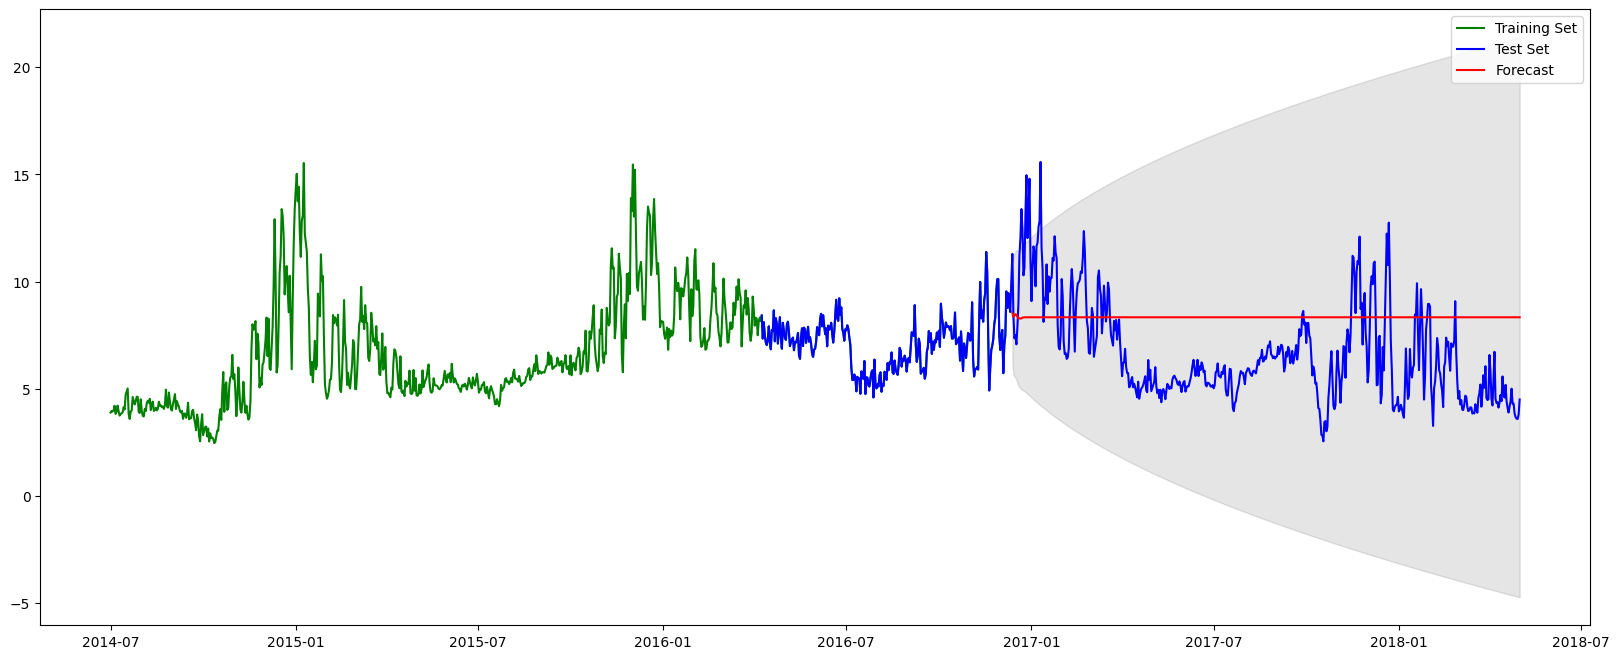

In [78]:
fig = plt.figure(figsize=(20,8))
x_last = results_last.get_prediction(start=(n_init_training_last+1), end=(nobs_last-1)).summary_frame()

plt.plot(init_training_last['2014-07-01':], color='g')
plt.plot(forSo[n_init_training+1:],color='b')
plt.plot(x_last['mean'], color='r')
plt.legend([ 'Training Set','Test Set', 'Forecast'])
plt.fill_between(x_last.index, x_last['mean_ci_lower'], x_last['mean_ci_upper'], color='k', alpha=0.1)

Metriche valutazione della predizione in-sample

In [71]:
Y_actual2 = forSo[n_init_training+1:]
Y_Predicted2 = x2['mean']
mape2 = met.mean_absolute_percentage_error(Y_actual2, Y_Predicted2)
print(mape2)

0.392911053198243


In [30]:
Y_actual_last = last_period[n_init_training_last+1:]
Y_Predicted_last = x_last['mean']
mape_last = met.mean_absolute_percentage_error(Y_actual_last, Y_Predicted_last)
print(mape_last)

0.31312801704205495


In [20]:
sqe=met.mean_squared_error(Y_actual2, Y_Predicted2)
print(sqe)

5.4086970984520955


In [36]:
sqe_last=met.mean_squared_error(Y_actual_last, Y_Predicted_last)
print(sqe_last)

5.104836644536564


In [21]:
mae = met.mean_absolute_error(Y_actual2, Y_Predicted2)
print(mae)

1.917539739895016


In [37]:
mae_last = met.mean_absolute_error(Y_actual_last, Y_Predicted_last)
print(mae_last)

1.8508952038581359


In [46]:
r2_last = met.r2_score(Y_actual_last, Y_Predicted_last)
print(r2_last)

0.021418586710639786


### Predizione out-sample

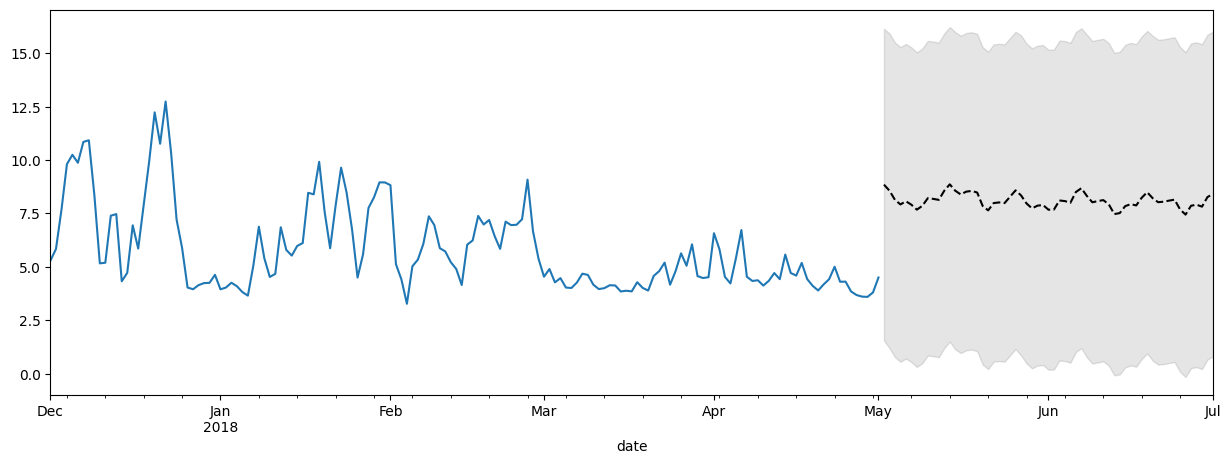

In [25]:
fig3, ax3 = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
forSo['2017-12-01':].plot(ax=ax3)

# Construct the forecasts
fcast = results_80.get_prediction(start=(nobs), end=(nobs+60)).summary_frame()
fcast['mean'].plot(ax=ax3, style='k--')
ax3.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)

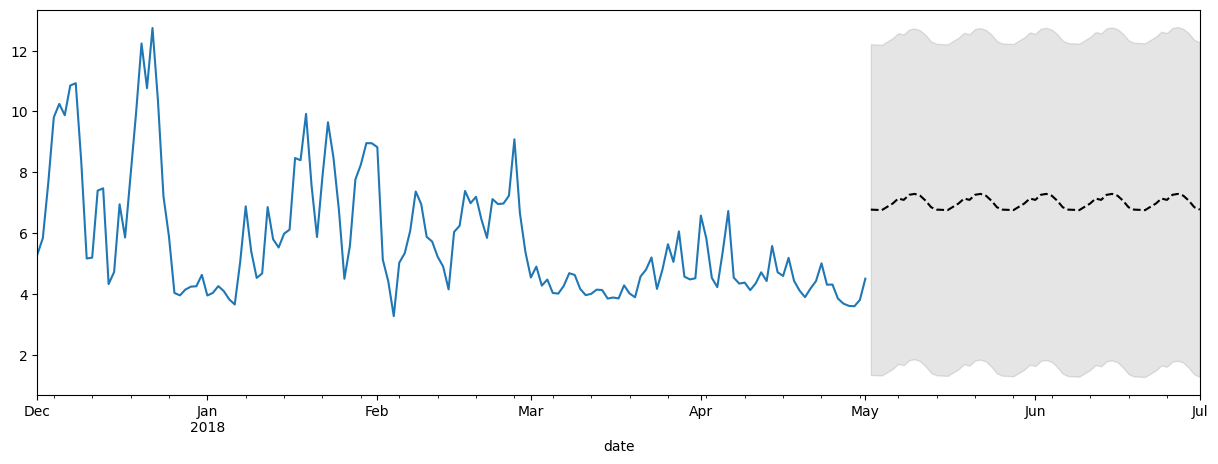

In [39]:
fig3, ax3 = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
forSo['2017-12-01':].plot(ax=ax3)

# Construct the forecasts
fcast_last = results_last.get_prediction(start=(nobs_last), end=(nobs_last+60)).summary_frame()
fcast_last['mean'].plot(ax=ax3, style='k--')
ax3.fill_between(fcast_last.index, fcast_last['mean_ci_lower'], fcast_last['mean_ci_upper'], color='k', alpha=0.1)

## Sarimax

In [44]:
model_sarimax=sm.tsa.statespace.SARIMAX(init_training_last,order=(1, 1, 1),seasonal_order=(5,1,5,12))
results_sarimax=model_sarimax.fit()

ax = plt.gca()
plt.plot(forSo, color='g')
plt.plot(last_period, color='b')
plt.plot(results_sarimax.fittedvalues, color='red')
ax.legend(['SO_2', 'Training Set','Forecast'])

print(results_sarimax.summary())
print("Il numero degli elementi del periodo considerato è: "+str(nobs_last))
print("L'indice dell'ultimo elemento del training set è: "+str(n_init_training_last))

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


KeyboardInterrupt: 

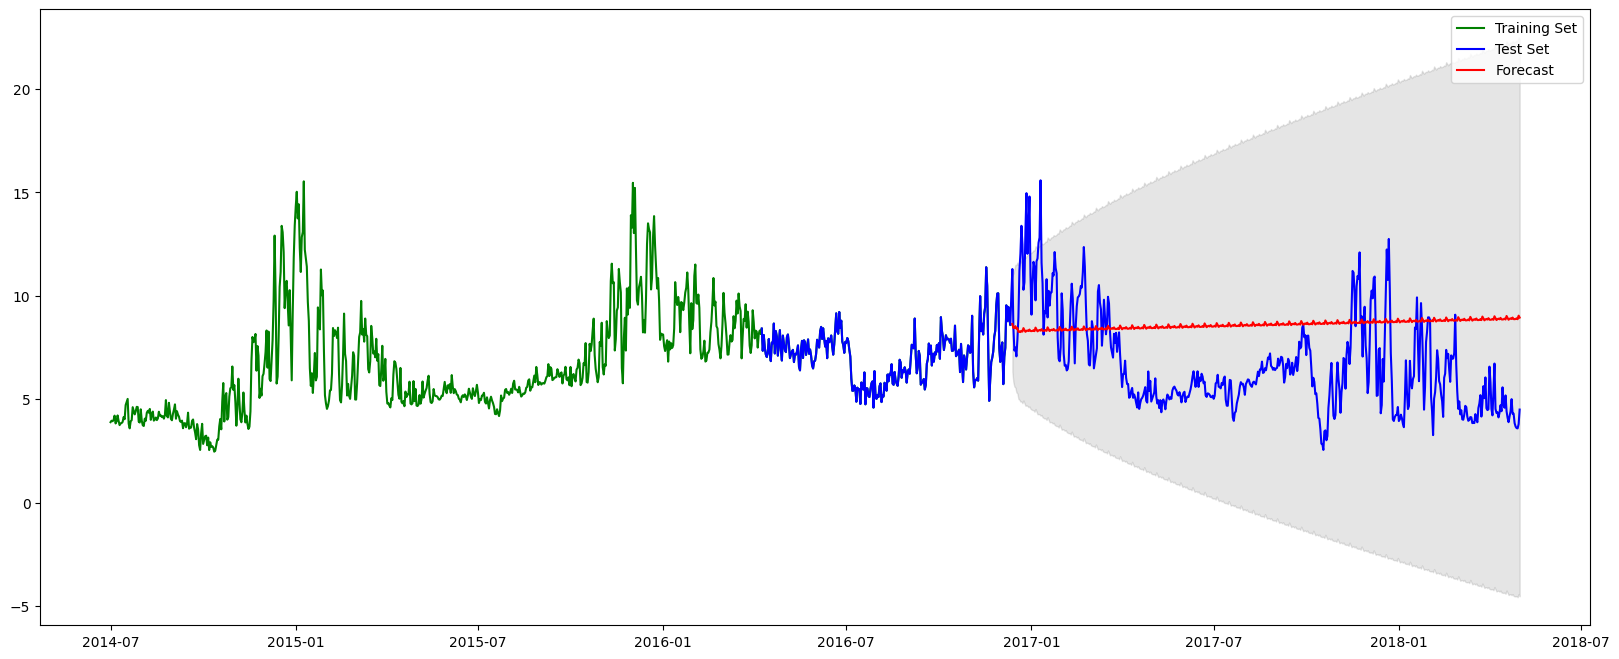

In [43]:
fig = plt.figure(figsize=(20,8))
x_sarimax = results_sarimax.get_prediction(start=(n_init_training_last+1), end=(nobs_last-1)).summary_frame()

plt.plot(init_training_last['2014-07-01':], color='g')
plt.plot(forSo[n_init_training+1:],color='b')
plt.plot(x_sarimax['mean'], color='r')
plt.legend([ 'Training Set','Test Set', 'Forecast'])
plt.fill_between(x_sarimax.index, x_sarimax['mean_ci_lower'], x_sarimax['mean_ci_upper'], color='k', alpha=0.1)

## Prova con autoarima

In [73]:
from pmdarima.arima import auto_arima
model_auto = auto_arima(init_training_last, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=12,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=5401.484, Time=5.21 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5551.695, Time=0.39 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5547.107, Time=0.50 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5546.080, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5549.701, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5404.275, Time=0.90 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=5403.021, Time=4.37 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5401.837, Time=7.16 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=5401.787, Time=2.41 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=5403.857, Time=13.01 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=5546.502, Time=0.60 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=5369.636, Time=2.29 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=5373.206, Time=0.77 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=5370.462, Time=5.58 sec
 ARIMA(2,1,1)(0,0,